<a href="https://colab.research.google.com/github/ahmedelraei/Covid_19_predictor/blob/main/Covid_19_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
import requests
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import matplotlib.pyplot as plt
import pickle

In [195]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/full_data.csv'
r = requests.get(url)
path = './owid-covid-latest.csv'
with open(path, 'wb') as f:
    f.write(r.content)

In [340]:
data = pd.read_csv(path)
data = data.fillna(0)
country = 'Egypt'
df = data[data.location.isin([country])]
basedate = pd.Timestamp(df.iloc[0, df.columns.get_loc('date')])
df['day'] = df['date'].apply(lambda x: (pd.to_datetime(x) - basedate).days + 1)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths,day
41212,2020-02-14,Egypt,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
41213,2020-02-15,Egypt,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
41214,2020-02-16,Egypt,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
41215,2020-02-17,Egypt,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4
41216,2020-02-18,Egypt,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...
41911,2022-01-13,Egypt,1011.0,21.0,396699.0,22063.0,6405.0,181.0,11971.0,336.0,700
41912,2022-01-14,Egypt,1079.0,34.0,397778.0,22097.0,6663.0,188.0,12203.0,345.0,701
41913,2022-01-15,Egypt,1101.0,26.0,398879.0,22123.0,6934.0,185.0,12521.0,355.0,702
41914,2022-01-16,Egypt,1197.0,25.0,400076.0,22148.0,7219.0,184.0,12917.0,351.0,703


In [341]:
predict = 'total_cases'
x = np.array(df['day']).reshape(-1, 1)
y = np.array(df[predict]).reshape(-1, 1)
poly = PolynomialFeatures(degree=6)
x = poly.fit_transform(x)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

for _ in range(1000):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)
    model = linear_model.LinearRegression()
    model.fit(x_train, y_train)
    with open("covid_cases.model", "wb") as f:
        pickle.dump(model, f)

Accuracy is 99.3%
Predicted total cases after 1 day is 420530


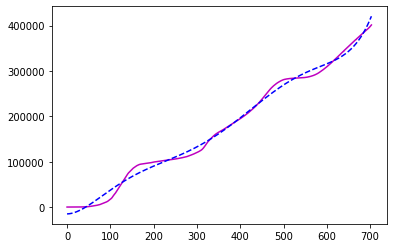

In [342]:
pickle_in = open("covid_cases.model", "rb")
model = pickle.load(pickle_in)
accuracy = model.score(x_test, y_test)
print(f'Accuracy is {round(accuracy*100, 1)}%')
y0 = model.predict(x)
plt.plot(y, '-m')
plt.plot(y0, '--b')
prediction = round(int(model.predict(poly.fit_transform([[704]]))), 2)
print(f'Predicted total cases after 1 day is {prediction}')